In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Load the diabetes dataset
data_X, data_y = datasets.load_diabetes(return_X_y=True)
print(data_X)
print(data_y)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

In [5]:
# Use only one feature
data_X = data_X[:, np.newaxis, 2]

# Split the data into training/testing sets
data_X_train = data_X[:-30]
data_X_test = data_X[-30:]

# Split the targets into training/testing sets
data_y_train = data_y[:-30]
data_y_test = data_y[-30:]

In [6]:
# Create linear regression object
model = linear_model.LinearRegression()

# Train the model using the training sets
model.fit(data_X_train, data_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
# The coefficients
print('Regression Coefficients: \n', model.coef_)
# Intercept
print('Intercept: \n', model.intercept_)

Regression Coefficients: 
 [941.43097333]
Intercept: 
 153.39713623331698


In [8]:
# Calculate diabetes progression based on the linear regression equation obtained from the above model fit
def predict(bmi):
  # print('hi')
  coeff = 938.23786125
  intercept = 152.91886182616167
  diabetes_progression = (coeff * bmi) + intercept
  return diabetes_progression

In [9]:
# test using one of the bmi values
dp = predict(-0.05147406)
print(dp)

104.6239498619075


In [10]:
pip install Pyfhel

In [11]:
from Pyfhel import Pyfhel, PyPtxt, PyCtxt

In [12]:
HE = Pyfhel()
# Creating Context and KeyGen in Pyfhel object. Using 64 buts for integer part and 32 bits for decimal part
HE.contextGen(p=65537, base=2, intDigits=64, fracDigits = 32) 
HE.keyGen()
print(HE)

<Pyfhel obj at 0x7f8e8aaaea50, [pk:Y, sk:Y, rtk:-, rlk:-, contx(p=65537, m=2048, base=2, sec=128, dig=64i.32f, batch=False)]>


In [13]:
# Calculating diabetes projection using equation given below
# diabetes_projection = coeff * bmi + intercept
def predict_encrypted(ctxt1):
  intercept = 152.91886182616167
  ctxt2 = HE.encryptFrac(intercept)

  coeff = 938.23786125
  ctxt3 = HE.encryptFrac(coeff)

  ctxtmul = ctxt3 * ctxt1
  ctxtsum = ctxtmul + ctxt2
  # resSum = HE.decryptFrac(ctxtsum)
  return ctxtsum
  # print(resSum)
  # return ctxtsum
# print(ctxt1)
# print(ctxt2)
# print(ctxt3)

In [14]:
# predict for bmi using encryption
bmi1 = -0.0730303
ctxt1 = HE.encryptFrac(bmi1)
dp_encrypted = predict_encrypted(ctxt1)
dp = HE.decryptFrac(dp_encrypted)
print(dp)

84.39906937489286


In [15]:
# predict for the same value of bmi without encryption
predict(-0.0730303)

84.3990693477158

In [16]:
# Generating predictions on test data using sklearn's model
test_predict = model.predict(data_X_test)

In [23]:
encrypted_test_predict = []
for bmi in data_X_test:
  ctxt = HE.encryptFrac(bmi)
  dp = predict_encrypted(ctxt)
  encrypted_test_predict.append(HE.decryptFrac(dp))


In [25]:
# R2 score for values predicted with and without encyption
r2_score(test_predict, encrypted_test_predict)

0.9998774257026259

In [26]:
r2_score(data_y_test, test_predict)

0.41092072813583513

In [27]:
r2_score(data_y_test, encrypted_test_predict)

0.4139985851963136

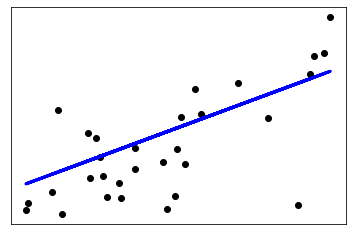

In [28]:
# Plot outputs
plt.scatter(data_X_test, data_y_test,  color='black')
plt.plot(data_X_test, encrypted_test_predict, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()